In [1]:
# load the pt-pt json file into a dataframe
import pandas as pd

df = pd.read_json('dataset/en-US.jsonl', lines=True)
df

,id,locale,partition,scenario,intent,utt,annot_utt,worker_id
0,0,en-US,test,alarm,alarm_set,wake me up at five am this week,wake me up at [time : five am] [date : this week],1
1,1,en-US,train,alarm,alarm_set,wake me up at nine am on friday,wake me up at [time : nine am] on [date : friday],1
2,2,en-US,train,alarm,alarm_set,set an alarm for two hours from now,set an alarm for [time : two hours from now],1
3,3,en-US,test,audio,audio_volume_mute,quiet,quiet,1
4,4,en-US,train,audio,audio_volume_mute,olly quiet,olly quiet,1
...,...,...,...,...,...,...,...,...
16516,17176,en-US,train,email,email_query,do i have emails,do i have emails,12
16517,17177,en-US,train,email,email_query,what emails are new,what emails are new,12
16518,17178,en-US,train,email,email_query,do i have new emails from john,do i have new emails from [person : john],12
16519,17179,en-US,test,email,email_query,has john sent me an email,has [person : john] sent me an email,12


calendar          2370
play              2024
qa                1685
email             1381
iot               1107
general            963
weather            855
transport          805
lists              793
news               709
recommendation     596
datetime           578
social             565
alarm              550
music              469
audio              387
takeaway           358
cooking            326
Name: scenario, dtype: int64
calendar          0.143454
play              0.122511
qa                0.101991
email             0.083591
iot               0.067006
general           0.058289
weather           0.051752
transport         0.048726
lists             0.048000
news              0.042915
recommendation    0.036075
datetime          0.034986
social            0.034199
alarm             0.033291
music             0.028388
audio             0.023425
takeaway          0.021669
cooking           0.019732
Name: scenario, dtype: float64


<AxesSubplot: >

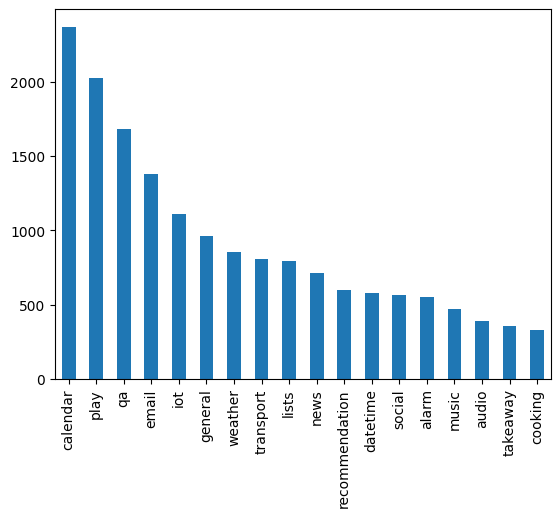

In [3]:
print(df['scenario'].value_counts())

print(df['scenario'].value_counts(normalize=True))

df['scenario'].value_counts().plot(kind='bar')

<AxesSubplot: >

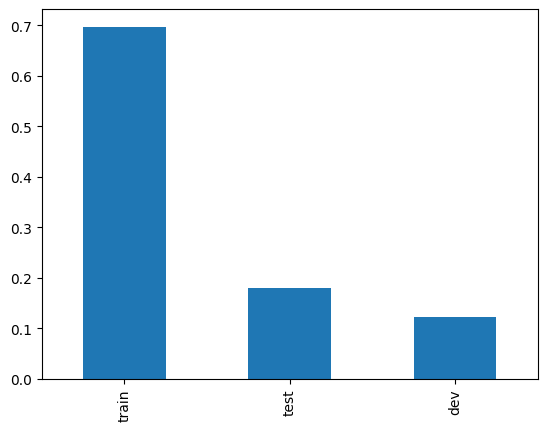

In [7]:
# plot the distribution of partitions with the percentage of each partition
df['partition'].value_counts(normalize=True).plot(kind='bar')

In [14]:
df_train = df[df['partition'] == 'train']
df_test = df[(df['partition'] == 'test')]
df_dev = df[(df['partition'] == 'dev')]


In [15]:
corpus_train = df_train['utt'].tolist()
corpus_dev = df_dev['utt'].tolist()

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(corpus_train).toarray()
X_dev = vectorizer.transform(corpus_dev).toarray()
print(X_train.shape, X_dev.shape)

(11514, 5115) (2033, 5115)


In [17]:
print(vectorizer.get_feature_names_out())

['aa' 'aapa' 'aaron' ... 'zoo' 'zucchini' 'zydeco']


In [18]:
y_train = df_train['intent']
y_dev = df_dev['intent']

print(X_train.shape, y_train.shape, X_dev.shape, y_dev.shape)

(11514, 5115) (11514,) (2033, 5115) (2033,)


In [29]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [30]:
y_pred = clf.predict(X_dev)
print(y_pred)

['iot_hue_lightoff' 'iot_hue_lightdim' 'iot_hue_lightchange' ...
 'email_sendemail' 'general_quirky' 'calendar_query']


In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# accuracy, precision, recall, f1
print(f"Accuracy: {accuracy_score(y_dev, y_pred)}")
print(f"Precision: {precision_score(y_dev, y_pred, average='macro')}")
print(f"Recall: {recall_score(y_dev, y_pred, average='macro')}")
print(f"F1: {f1_score(y_dev, y_pred, average='macro')}")

Accuracy: 0.720609936055091
Precision: 0.7781037257104889
Recall: 0.5660075087078197
F1: 0.6163523585770985


c:\Users\nrtc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Baseline

The baseline results are 0.6163 for the F1-macro score.